### 1.  Загрузка и подготовка данных

In [1]:
# Загрузка необходимых библиотек
import pandas as pd    # библиотека для работы с таблицами 
import numpy as np     # библиотека для работы с матрицами 
# библиотека для работы с графиками 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # выбор стиля у графиков
%matplotlib inline
# остальные библиотека подгружаются далее, по мере необходимости


In [2]:
df = pd.read_excel("grades/student.xlsx")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#проверка на нулевые значения
print(df.isnull().sum())
print(df.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
X = df.drop(columns = ['G1', 'G2', 'G3'], axis = 1) #входные параметры, по которым будем классифицировать
#X = df[['sex', 'age']].copy() #для отобржаения части дерева решений

In [7]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [8]:
y = df['G3'] #целевой столбце

In [9]:
#преобразование категорийных данных
from sklearn import preprocessing
from tqdm import tqdm
for f in tqdm(X.columns):
    if X[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X[f].values) + list(X[f].values))
        X[f] = lbl.transform(list(X[f].values))

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1364.89it/s]


In [10]:
target_names = []
for target in y.unique():
    target_names.append(str(target))

In [11]:
target_names

['6',
 '10',
 '15',
 '11',
 '19',
 '9',
 '12',
 '14',
 '16',
 '5',
 '8',
 '17',
 '18',
 '13',
 '20',
 '7',
 '0',
 '4']

### 2. Построение леса из 100% исходных данных

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as skm
model = DecisionTreeClassifier(criterion = "entropy") #параметр критерия задаёт критерий разбиения
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#отображение дерева решений
fn=X.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=600) #change figsize, dpi for the best view
plot_tree(model,
           feature_names = fn, 
           class_names = target_names,
           filled = True)

In [ ]:
fig.savefig('tree.png')

### 3. Доработанная программа

#### Разделение выборки на тестовую и обучающую

In [29]:
#разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9) #параметр train_size задаёт соотношение обучающей и тестовой выборок
model = DecisionTreeClassifier(criterion = "entropy") #параметр критерия задаёт критерий разбиения
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Отображение результатов классификациии 
#### Матрица ошибок

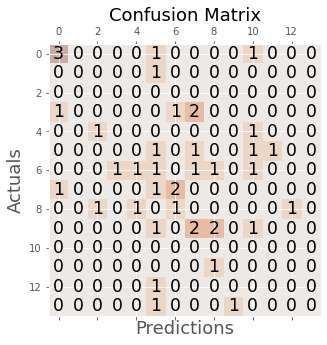

In [30]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#### Критерии precision_score, recall_score, f1_score, accuracy_score

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           5       0.00      0.00      0.00         2
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         5
          10       0.10      0.22      0.14         9
          11       0.00      0.00      0.00        10
          12       0.14      0.20      0.17         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2

    accuracy                           0.10        79
   macro avg       0.10   

C:\Users\burov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\burov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\burov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Построение дерева решения для вторго набора данных

In [31]:
from sklearn import datasets
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()
# Смотрим на названия переменных
print(iris.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
print(iris.data[:10])
# Смотрим на целевую переменную:
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


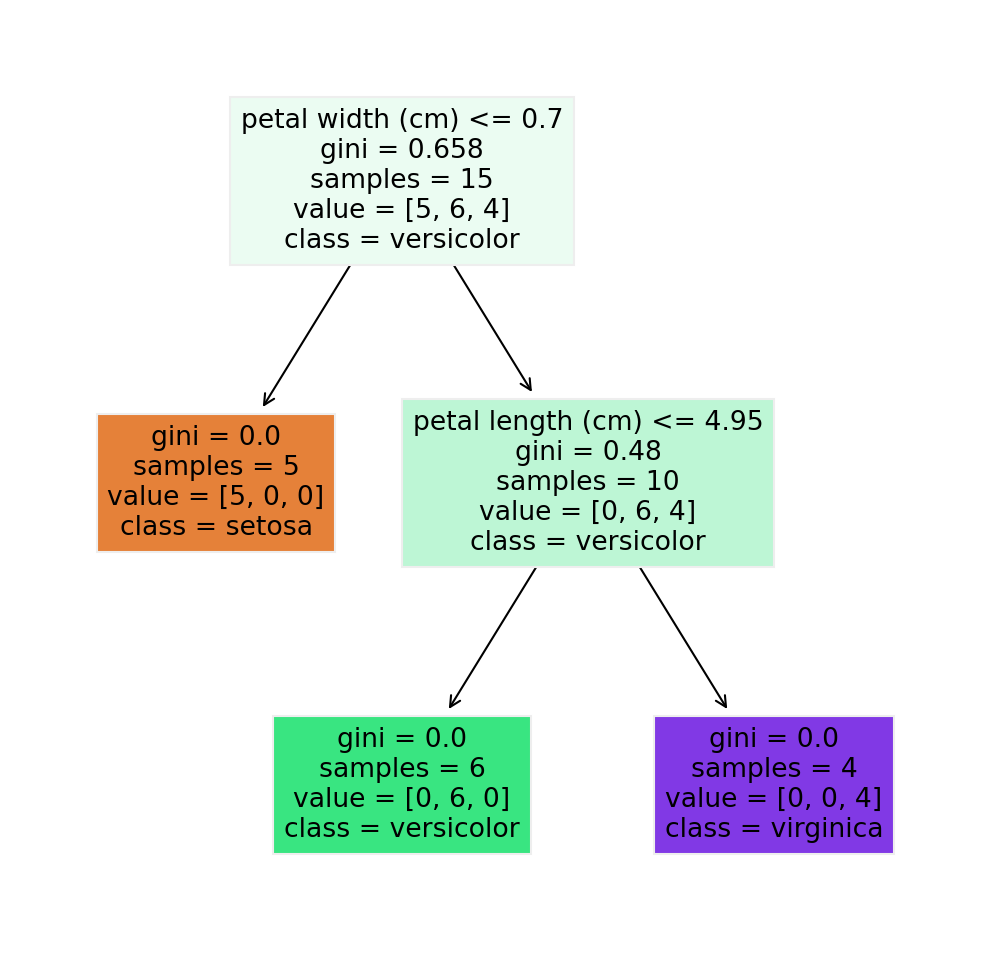

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                    iris_frame['target'], test_size = 0.9, random_state = 0)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as skm
model = DecisionTreeClassifier(criterion = "gini") #параметр критерия задаёт критерий разбиения
model.fit(X_train, y_train)
#отображение дерева решений
fn=iris_frame.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300) #change figsize, dpi for the best view
plot_tree(model,
           feature_names = fn, 
           class_names = iris.target_names,
           filled = True)
fig.savefig('tree.png')

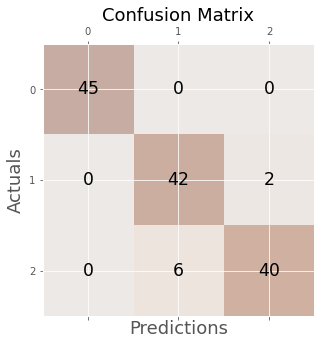

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.88      0.95      0.91        44
           2       0.95      0.87      0.91        46

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135



In [49]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))